In [ ]:
# spam-mails-dataset
# folder enron1 yang terdiri atas dua subfolder, yakni spam dan ham. Masing-masing subfolder memuat kumpulan surat elektronik (email). Setiap berkas teks pada kedua subfolder tersebut diproses melalui iterasi untuk kemudian dibentuk menjadi sebuah data frame. Hasil pemrosesan data tersebut selanjutnya disimpan dalam berkas berformat CSV.
## Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# Reading the data 
df = pd.read_csv("spam_ham_dataset.csv",encoding='latin-1')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
# Jumlah baris data
jumlah_baris = len(df)
jumlah_baris


5171

In [5]:
# Panjang Rata Rata
df["text_length"] = df["text"].astype(str).apply(len)
rata_panjang = df["text_length"].mean()
rata_panjang

np.float64(1048.391993811642)

In [6]:
# Cek Data duplikasi 
duplikat = df.duplicated().sum()
duplikat

df[df.duplicated()]

,Unnamed: 0,label,text,label_num,text_length


In [7]:
# Cek Data Kosong
kosong = df.isnull().sum()
kosong

df.isnull().sum().sum()

np.int64(0)

In [8]:
# Untuk Cek kolom
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num', 'text_length'], dtype='object')

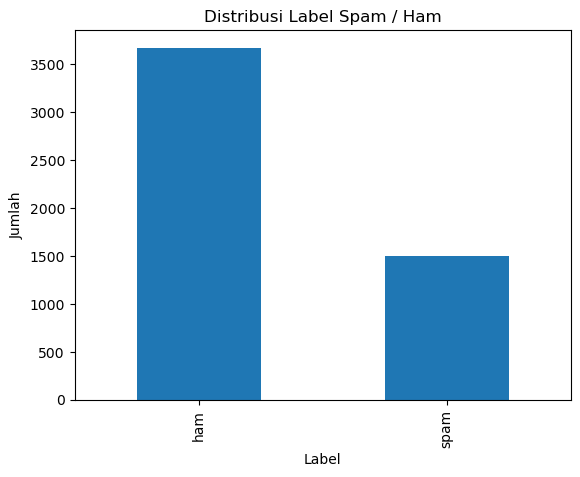

In [9]:
# Untuk menampilkan hasil distribusi 
df["label"].value_counts().plot(kind="bar")
plt.title("Distribusi Label Spam / Ham")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()


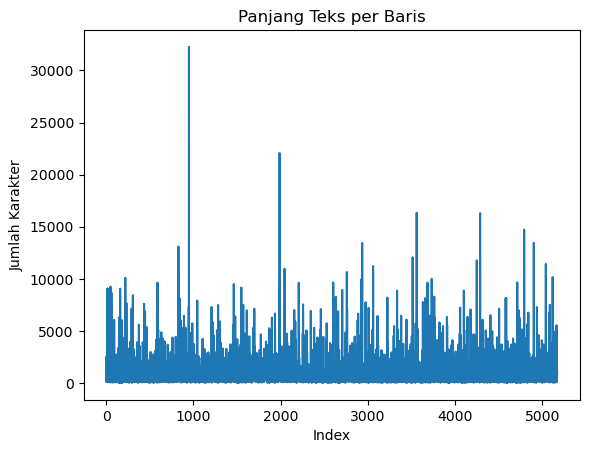

In [10]:
plt.plot(df["text_length"])
plt.title("Panjang Teks per Baris")
plt.xlabel("Index")
plt.ylabel("Jumlah Karakter")
plt.show()


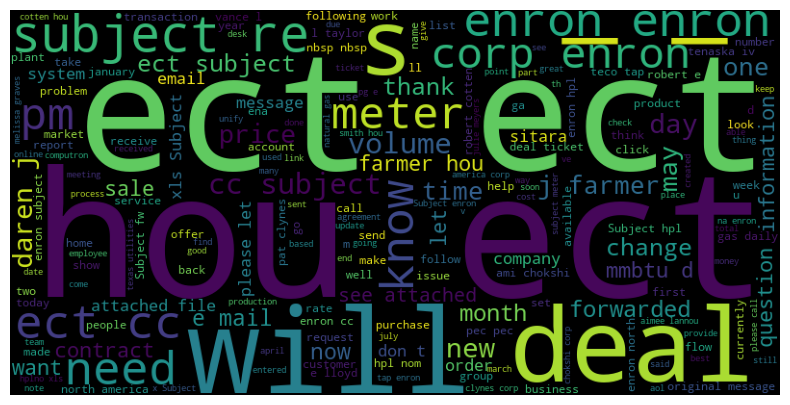

In [14]:
from wordcloud import WordCloud

wc = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.show()



In [15]:
#TOKENISASI
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

df["tokens"] = df["text"].astype(str).apply(word_tokenize)
df["tokens"].head()


[nltk_data] Downloading package punkt to C:\Users\HP ELITEBOOK 840
[nltk_data]     G6\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


0    [Subject, :, enron, methanol, ;, meter, #, :, ...
1    [Subject, :, hpl, nom, for, january, 9, ,, 200...
2    [Subject, :, neon, retreat, ho, ho, ho, ,, we,...
3    [Subject, :, photoshop, ,, windows, ,, office,...
4    [Subject, :, re, :, indian, springs, this, dea...
Name: tokens, dtype: object

In [ ]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")

lemmatizer = WordNetLemmatizer()
df["lemmatized"] = df["tokens"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df["lemmatized"].head()


[nltk_data] Downloading package wordnet to C:\Users\HP ELITEBOOK 840
[nltk_data]     G6\AppData\Roaming\nltk_data...


0    [Subject, :, enron, methanol, ;, meter, #, :, ...
1    [Subject, :, hpl, nom, for, january, 9, ,, 200...
2    [Subject, :, neon, retreat, ho, ho, ho, ,, we,...
3    [Subject, :, photoshop, ,, window, ,, office, ...
4    [Subject, :, re, :, indian, spring, this, deal...
Name: lemmatized, dtype: object

In [ ]:
# Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
df["stemmed"] = df["tokens"].apply(lambda x: [stemmer.stem(word) for word in x])
df["stemmed"].head()



0    [subject, :, enron, methanol, ;, meter, #, :, ...
1    [subject, :, hpl, nom, for, januari, 9, ,, 200...
2    [subject, :, neon, retreat, ho, ho, ho, ,, we,...
3    [subject, :, photoshop, ,, window, ,, offic, ....
4    [subject, :, re, :, indian, spring, thi, deal,...
Name: stemmed, dtype: object

In [ ]:
# Stopword Removal
import string
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

def clean_tokens(tokens):
    cleaned = []
    for word in tokens:
        word = word.lower()
        if word not in stop_words and word not in string.punctuation and not word.isnumeric():
            cleaned.append(word)
    return cleaned

df["cleaned"] = df["tokens"].apply(clean_tokens)
df["cleaned"].head()


[nltk_data] Downloading package stopwords to C:\Users\HP ELITEBOOK 840
[nltk_data]     G6\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [subject, enron, methanol, meter, follow, note...
1    [subject, hpl, nom, january, see, attached, fi...
2    [subject, neon, retreat, ho, ho, ho, around, w...
3    [subject, photoshop, windows, office, cheap, m...
4    [subject, indian, springs, deal, book, teco, p...
Name: cleaned, dtype: object

In [20]:
# 5. Text Normalisasi
df["normalized"] = df["cleaned"].apply(lambda x: " ".join(x))
df["normalized"].head()


0    subject enron methanol meter follow note gave ...
1    subject hpl nom january see attached file hpln...
2    subject neon retreat ho ho ho around wonderful...
3    subject photoshop windows office cheap main tr...
4    subject indian springs deal book teco pvr reve...
Name: normalized, dtype: object

In [ ]:
# Lebeling Data
from textblob import TextBlob

df["polarity"] = df["normalized"].apply(lambda x: TextBlob(x).sentiment.polarity)
df[["text", "polarity"]].head()


,text,polarity
0,Subject: enron methanol ; meter # : 988291\r\n...,-0.041667
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",-0.166667
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0.173208
3,"Subject: photoshop , windows , office . cheap ...",0.160714
4,Subject: re : indian springs\r\nthis deal is t...,-0.166667


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["normalized"])
X



<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 319890 stored elements and shape (5171, 45595)>

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape



((4136, 45595), (1035, 45595))

In [34]:
df.head()


,Unnamed: 0,label,text,label_num,text_length,tokens,lemmatized,stemmed,cleaned,normalized,polarity
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,"[Subject, :, enron, methanol, ;, meter, #, :, ...","[Subject, :, enron, methanol, ;, meter, #, :, ...","[subject, :, enron, methanol, ;, meter, #, :, ...","[subject, enron, methanol, meter, follow, note...",subject enron methanol meter follow note gave ...,-0.041667
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,"[Subject, :, hpl, nom, for, january, 9, ,, 200...","[Subject, :, hpl, nom, for, january, 9, ,, 200...","[subject, :, hpl, nom, for, januari, 9, ,, 200...","[subject, hpl, nom, january, see, attached, fi...",subject hpl nom january see attached file hpln...,-0.166667
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,"[Subject, :, neon, retreat, ho, ho, ho, ,, we,...","[Subject, :, neon, retreat, ho, ho, ho, ,, we,...","[subject, :, neon, retreat, ho, ho, ho, ,, we,...","[subject, neon, retreat, ho, ho, ho, around, w...",subject neon retreat ho ho ho around wonderful...,0.173208
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,"[Subject, :, photoshop, ,, windows, ,, office,...","[Subject, :, photoshop, ,, window, ,, office, ...","[subject, :, photoshop, ,, window, ,, offic, ....","[subject, photoshop, windows, office, cheap, m...",subject photoshop windows office cheap main tr...,0.160714
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,"[Subject, :, re, :, indian, springs, this, dea...","[Subject, :, re, :, indian, spring, this, deal...","[subject, :, re, :, indian, spring, thi, deal,...","[subject, indian, springs, deal, book, teco, p...",subject indian springs deal book teco pvr reve...,-0.166667
